### Soundnames: Learning from sequence of sounds

In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
SAMPLE = 100000
# Florida voter
df = pd.read_csv('/opt/data/fl_voter/fl_voter_name_gender_race.csv', usecols=['last_name', 'first_name', 'race'], nrows=SAMPLE * 1.5)
df.dropna(subset=['first_name', 'last_name'], inplace=True)

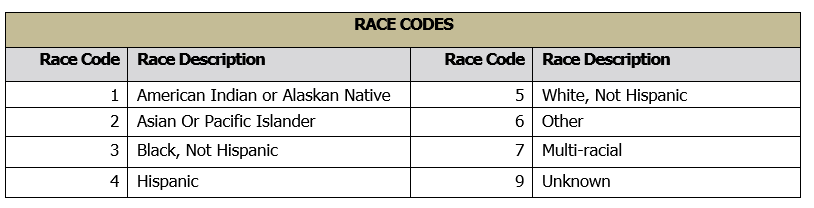

In [3]:
rmap = {1: 'aian',
        2: 'asian',
        3: 'nh_black',
        4: 'hispanic',
        5: 'nh_white',
        6: 'other',
        7: 'multi_racial',
        9: 'unknown'}

In [4]:
df['race'] = df.race.apply(lambda c: rmap[c])
df

,last_name,first_name,race
0,Walker,Elizabeth,nh_white
1,Palmer,Alton,nh_white
2,Mc Cleod,Alicia,nh_black
3,Scarborough,Dale,nh_white
4,Walker,Daniel,nh_white
5,Collier,Seth,nh_black
6,Martin,Robert,nh_white
7,Turner,Sharon,nh_black
8,Wood,Lilianna,hispanic
9,Planck,Barbara,nh_white


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.groupby(['race']).size()

race
aian              553
asian            5354
hispanic        10129
multi_racial     1508
nh_black        23223
nh_white        93525
other            5245
unknown          1570
dtype: int64

# Evalulate

In [7]:
sdf = df[df.race.isin(['asian', 'hispanic', 'nh_black', 'nh_white'])].sample(SAMPLE, random_state=10)
sdf

,last_name,first_name,race
70327,Stamm,Patricia,nh_white
113593,Hill,Ralph,nh_white
126263,Hansleat,Christopher,nh_white
107149,Nixon,James,nh_black
76878,Rolle,Philip,nh_black
32765,Weintraub,David,nh_white
80271,Overacker,Blake,nh_white
46545,Thomson,Michael,hispanic
117598,Ngwafor,Yolande,nh_black
67616,Martin,Bryan,nh_white


In [8]:
from ethnicolr import pred_fl_reg_name, pred_fl_reg_soundname

Using TensorFlow backend.


In [9]:
help(pred_fl_reg_name)

Help on method pred_fl_reg_name in module ethnicolr.pred_fl_reg_name:

pred_fl_reg_name(df, lname_col, fname_col) method of builtins.type instance
    Predict the race/ethnicity by the full name using Florida voter model.
    
    Using the Florida voter full name model to predict the race/ethnicity of
    the input DataFrame.
    
    Args:
        df (:obj:`DataFrame`): Pandas DataFrame containing the last name and
            first name column.
        lname_col (str or int): Column's name or location of the last name in
            DataFrame.
        fname_col (str or int): Column's name or location of the first name in
            DataFrame.
    
    Returns:
        DataFrame: Pandas DataFrame with additional columns:
            - `race` the predict result
            - Additional columns for probability of each classes.



In [10]:
sdf.columns = ['last_name', 'first_name', 'race_orig']
sdf

,last_name,first_name,race_orig
70327,Stamm,Patricia,nh_white
113593,Hill,Ralph,nh_white
126263,Hansleat,Christopher,nh_white
107149,Nixon,James,nh_black
76878,Rolle,Philip,nh_black
32765,Weintraub,David,nh_white
80271,Overacker,Blake,nh_white
46545,Thomson,Michael,hispanic
117598,Ngwafor,Yolande,nh_black
67616,Martin,Bryan,nh_white


## Ethnicolr

In [11]:
edf = pred_fl_reg_name(sdf, 'last_name', 'first_name')
edf





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




,last_name,first_name,race_orig,race,asian,hispanic,nh_black,nh_white
70327,Stamm,Patricia,nh_white,nh_white,0.001412,0.010637,0.046354,0.941598
113593,Hill,Ralph,nh_white,nh_white,0.003834,0.008628,0.258736,0.728802
126263,Hansleat,Christopher,nh_white,nh_white,0.004957,0.015766,0.036128,0.943149
107149,Nixon,James,nh_black,nh_white,0.002323,0.001857,0.232952,0.762868
76878,Rolle,Philip,nh_black,nh_white,0.006509,0.027061,0.168978,0.797452
32765,Weintraub,David,nh_white,nh_white,0.001058,0.008580,0.001835,0.988527
80271,Overacker,Blake,nh_white,nh_white,0.000873,0.010072,0.010636,0.978419
46545,Thomson,Michael,hispanic,nh_white,0.002091,0.006707,0.109481,0.881721
117598,Ngwafor,Yolande,nh_black,asian,0.553349,0.024487,0.277182,0.144982
67616,Martin,Bryan,nh_white,nh_white,0.003680,0.028832,0.087668,0.879820


In [12]:
edf[edf.race_orig!=edf.race]

,last_name,first_name,race_orig,race,asian,hispanic,nh_black,nh_white
107149,Nixon,James,nh_black,nh_white,0.002323,0.001857,0.232952,0.762868
76878,Rolle,Philip,nh_black,nh_white,0.006509,0.027061,0.168978,0.797452
46545,Thomson,Michael,hispanic,nh_white,0.002091,0.006707,0.109481,0.881721
117598,Ngwafor,Yolande,nh_black,asian,0.553349,0.024487,0.277182,0.144982
41630,Young,Tracey,nh_black,nh_white,0.003558,0.004002,0.319959,0.672481
97266,Bowles,Jarrett,nh_black,nh_white,0.000959,0.005905,0.166097,0.827039
129269,Carter,Koby,hispanic,nh_white,0.008078,0.012652,0.180947,0.798323
8257,Brown,Murray,nh_white,nh_black,0.002375,0.004668,0.573051,0.419906
66423,Terrell,Gabriel,nh_black,nh_white,0.012548,0.310676,0.134175,0.542601
148930,Adams,Kirstin,nh_black,nh_white,0.007258,0.014146,0.067739,0.910856


In [13]:
import keras
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(df, title=''):

    class_labels = df.race_orig.astype('category').cat.categories
    n_classes = len(class_labels)

    y_test = np.array(df.race_orig.astype('category').cat.codes)
    y_test = keras.utils.to_categorical(y_test, n_classes)
    y_score = df[class_labels].to_numpy()
    
    # Plotlinewidth.
    lw = 2

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig = plt.figure(1, figsize=(12, 8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    cmap = plt.get_cmap("tab10")
    colors = cycle([cmap(i) for i in range(n_classes)])

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(class_labels[i], roc_auc[i]))
        if i >= 19:
            break

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

/opt/venv37/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


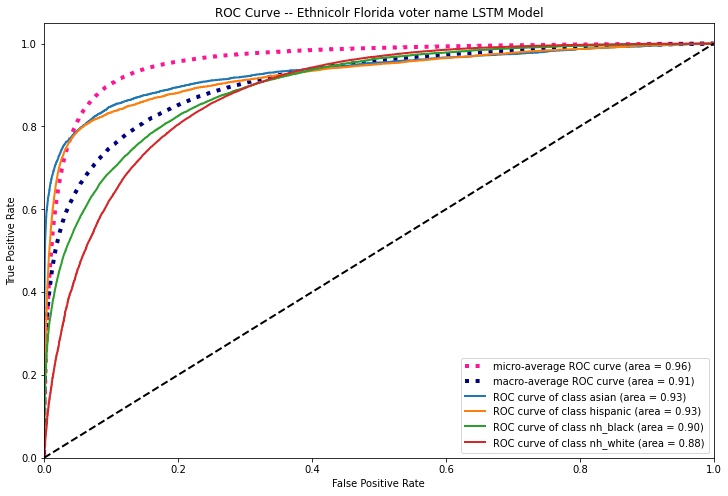

In [14]:
plot_roc_curve(edf, 'ROC Curve -- Ethnicolr Florida voter name LSTM Model')

## Soundnames

In [15]:
edf2 = pred_fl_reg_soundname(sdf, 'last_name', 'first_name')
edf2

,last_name,first_name,race_orig,race,asian,hispanic,nh_black,nh_white
70327,Stamm,Patricia,nh_white,nh_white,0.013371,0.039493,0.092745,0.854392
113593,Hill,Ralph,nh_white,nh_white,0.003276,0.010261,0.098314,0.888149
126263,Hansleat,Christopher,nh_white,nh_white,0.019412,0.053285,0.207894,0.719408
107149,Nixon,James,nh_black,nh_black,0.003627,0.007037,0.936663,0.052673
76878,Rolle,Philip,nh_black,nh_white,0.009926,0.141765,0.265204,0.583105
32765,Weintraub,David,nh_white,nh_white,0.017998,0.253081,0.277360,0.451561
80271,Overacker,Blake,nh_white,nh_white,0.009132,0.023917,0.300354,0.666597
46545,Thomson,Michael,hispanic,nh_black,0.048354,0.017653,0.495880,0.438113
117598,Ngwafor,Yolande,nh_black,nh_white,0.026524,0.059345,0.208490,0.705641
67616,Martin,Bryan,nh_white,nh_white,0.005361,0.099264,0.179060,0.716315


In [16]:
edf2[edf2.race_orig!=edf2.race]

,last_name,first_name,race_orig,race,asian,hispanic,nh_black,nh_white
76878,Rolle,Philip,nh_black,nh_white,0.009926,0.141765,0.265204,0.583105
46545,Thomson,Michael,hispanic,nh_black,0.048354,0.017653,0.495880,0.438113
117598,Ngwafor,Yolande,nh_black,nh_white,0.026524,0.059345,0.208490,0.705641
41630,Young,Tracey,nh_black,asian,0.626420,0.009172,0.330633,0.033775
91120,Patterson,Burton,nh_white,nh_black,0.161004,0.023201,0.496568,0.319228
148983,Zahedi,Zahra,nh_white,asian,0.650308,0.027868,0.058930,0.262894
64421,Charudattan,Savitar,asian,nh_black,0.142903,0.001958,0.836754,0.018385
102415,Nyquist,Samuel,nh_white,nh_black,0.048053,0.119069,0.577847,0.255031
97266,Bowles,Jarrett,nh_black,nh_white,0.020016,0.181205,0.285744,0.513034
129269,Carter,Koby,hispanic,nh_white,0.003947,0.041693,0.386461,0.567899


/opt/venv37/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


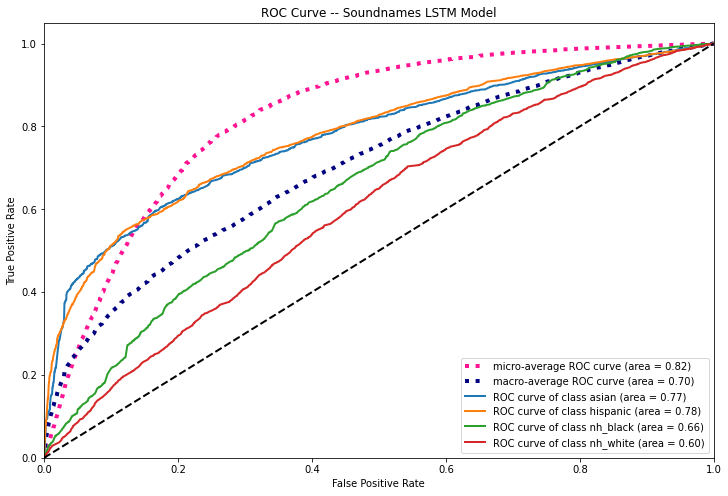

In [17]:
plot_roc_curve(edf2, 'ROC Curve -- Soundnames LSTM Model')

## Average Soundnames + Ethnicolr

In [18]:
probs = pd.concat((edf, edf2)).groupby(level=0).mean()
edf3 = edf[['first_name', 'last_name', 'race_orig']].copy()
edf3 = pd.concat([edf3, probs], axis=1)
edf3['race'] = probs.idxmax(axis=1)
edf3

,first_name,last_name,race_orig,asian,hispanic,nh_black,nh_white,race
0,Elizabeth,Walker,nh_white,0.005717,0.048452,0.340489,0.605342,nh_white
1,Alton,Palmer,nh_white,0.008869,0.066710,0.371555,0.552866,nh_white
3,Dale,Scarborough,nh_white,0.230684,0.019807,0.043976,0.705533,nh_white
4,Daniel,Walker,nh_white,0.005445,0.046284,0.323591,0.624680,nh_white
5,Seth,Collier,nh_black,0.008728,0.022563,0.087592,0.881118,nh_white
6,Robert,Martin,nh_white,0.003473,0.052829,0.116699,0.826999,nh_white
7,Sharon,Turner,nh_black,0.002303,0.004116,0.541648,0.451934,nh_black
8,Lilianna,Wood,hispanic,0.024998,0.106819,0.237043,0.631140,nh_white
9,Barbara,Planck,nh_white,0.002566,0.435535,0.035664,0.526235,nh_white
11,Scott,Zofnas,nh_white,0.023966,0.018383,0.271646,0.686005,nh_white


In [19]:
edf3[edf3.race_orig!=edf3.race]

,first_name,last_name,race_orig,asian,hispanic,nh_black,nh_white,race
5,Seth,Collier,nh_black,0.008728,0.022563,0.087592,0.881118,nh_white
8,Lilianna,Wood,hispanic,0.024998,0.106819,0.237043,0.631140,nh_white
17,David,Estores,asian,0.014508,0.679432,0.028218,0.277843,hispanic
23,Ronda,Feathers,nh_black,0.015252,0.010921,0.407520,0.566306,nh_white
38,Lincoln,Sims,nh_white,0.023191,0.030205,0.538129,0.408475,nh_black
47,Stuart,Thomas,nh_black,0.019653,0.023918,0.212609,0.743821,nh_white
58,Beatrice,Christian,nh_black,0.008708,0.068320,0.397853,0.525118,nh_white
69,Donald,Delay,nh_black,0.007549,0.065065,0.101495,0.825892,nh_white
80,Cami,Stincer,hispanic,0.080655,0.021869,0.120286,0.777191,nh_white
81,Ashley,Jamieson,nh_black,0.011313,0.027204,0.415172,0.546311,nh_white


/opt/venv37/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


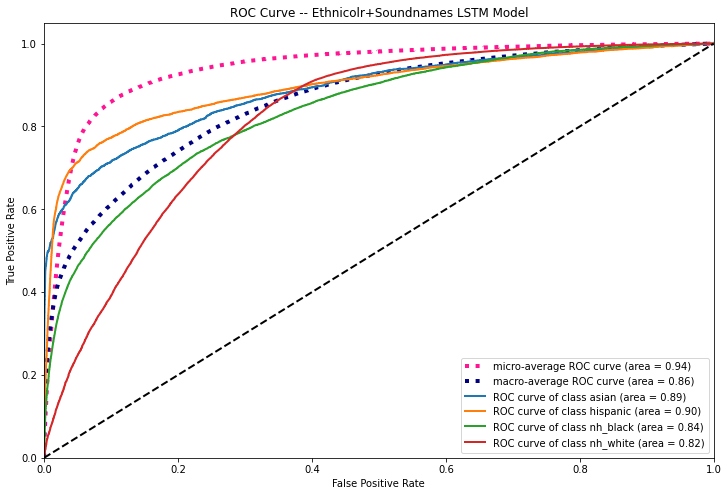

In [20]:
plot_roc_curve(edf3, 'ROC Curve -- Ethnicolr+Soundnames LSTM Model')